In [45]:
print((4+4)%5+1)

4


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('NationalNames.csv')

# 1. Вивести перші 8 рядків набору даних
print("1. Перші 8 рядків набору даних:")
print(data.head(8))

1. Перші 8 рядків набору даних:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [68]:
# 3. Отримати імена стовпців
print("\n3. Імена стовпців:")
print(data.columns.tolist())


3. Імена стовпців:
['Id', 'Name', 'Year', 'Gender', 'Count']


In [69]:
# 6. Підрахувати кількість унікальних жіночих та чоловічих імен
unique_names_by_gender = data.groupby('Gender')['Name'].nunique()
print("\n6. Кількість унікальних імен за статтю:")
print(unique_names_by_gender)


6. Кількість унікальних імен за статтю:
Gender
F    64911
M    39199
Name: Name, dtype: int64


In [70]:
# 7. Знайти 5 найпопулярніших чоловічих імен у 2010 році
top_male_names_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')].nlargest(5, 'Count')
print("\n7. 5 найпопулярніших чоловічих імен у 2010 році:")
print(top_male_names_2010[['Name', 'Count']])


7. 5 найпопулярніших чоловічих імен у 2010 році:
            Name  Count
1677392    Jacob  22082
1677393    Ethan  17985
1677394  Michael  17308
1677395   Jayden  17152
1677396  William  17030


In [71]:
# 8. Найпопулярніше ім'я за результатами одного року
most_popular_name = data.loc[data['Count'].idxmax()]
print("\n8. Найпопулярніше ім'я за весь час:")
print(f"The name is '{most_popular_name['Name']}' in {most_popular_name['Year']} with {most_popular_name['Count']} occurrences.")


8. Найпопулярніше ім'я за весь час:
The name is 'Linda' in 1947 with 99680 occurrences.


In [72]:
# Перевіряємо дані за 2008 рік
data_2008 = data[data['Year'] == 2008]

# Перевірка, чи є записи
if not data_2008.empty:
    # Знаходимо ім'я з найбільшим Count
    most_popular_2008 = data_2008.loc[data_2008['Count'].idxmax()]
    print("\n12. Найпопулярніше ім'я в 2008 році:")
    print(most_popular_2008[['Name', 'Count']])
else:
    print("\n12. У наборі даних немає записів за 2008 рік.")


12. Найпопулярніше ім'я в 2008 році:
Name     Jacob
Count    22568
Name: 1608302, dtype: object


In [73]:
# 13. Рік, коли ім'я "Jacob" було найпопулярнішим серед чоловічих імен
jacob_records = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'M')]
jacob_max_year = jacob_records[jacob_records['Count'] == jacob_records['Count'].max()]
print("\n13. Рік, коли ім'я 'Jacob' було найпопулярнішим серед чоловічих імен:")
print(jacob_max_year)


13. Рік, коли ім'я 'Jacob' було найпопулярнішим серед чоловічих імен:
              Id   Name  Year Gender  Count
1292697  1292698  Jacob  1998      M  36001


In [74]:
# 14. Рік із найбільшою кількістю гендерно-нейтральних імен
gender_neutral = data.groupby(['Year', 'Name'])['Gender'].nunique()
neutral_year = gender_neutral[gender_neutral > 1].reset_index().groupby('Year').size().idxmax()
print("\n14. Рік із найбільшою кількістю гендерно-нейтральних імен:", neutral_year)


14. Рік із найбільшою кількістю гендерно-нейтральних імен: 2008


In [75]:
# 15. Загальна кількість народжень за рік
total_births_per_year = data.groupby('Year')['Count'].sum()
print("\n15. Загальна кількість народжень за рік (перші 5 років):")
print(total_births_per_year.head())


15. Загальна кількість народжень за рік (перші 5 років):
Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64


In [76]:
# 16. Рік, коли народилось найбільше дітей
year_most_births = total_births_per_year.idxmax()
print("\n16. Рік, коли народилось найбільше дітей:", year_most_births)


16. Рік, коли народилось найбільше дітей: 1957


In [77]:
# 17. Кількість дівчаток та хлопчиків кожного року
gender_counts_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("\n17. Кількість дівчаток та хлопчиків кожного року (перші 5 років):")
print(gender_counts_per_year.head())


17. Кількість дівчаток та хлопчиків кожного року (перші 5 років):
Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


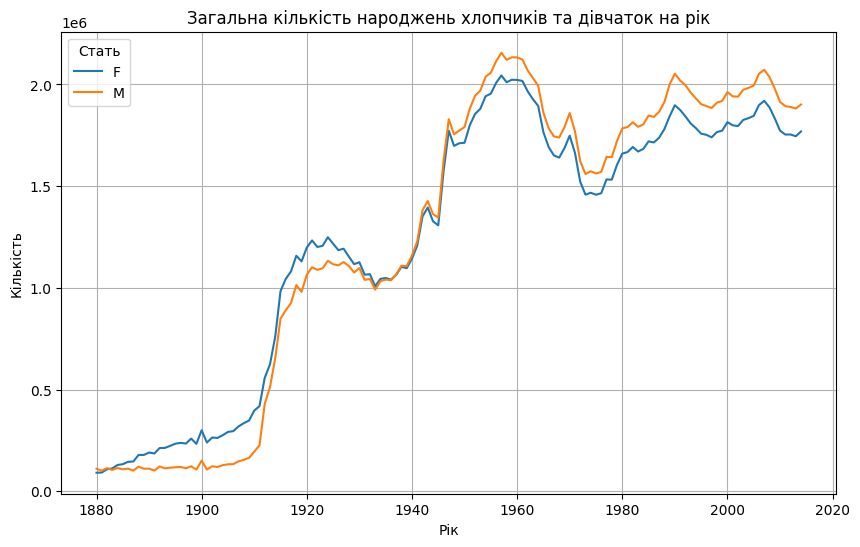

In [78]:
# 19. Графік загальної кількості народжень хлопчиків та дівчаток на рік
gender_counts_per_year.plot(figsize=(10, 6), title="Загальна кількість народжень хлопчиків та дівчаток на рік")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend(title="Стать")
plt.grid()
plt.savefig("gender_births_per_year.png")
plt.show()

In [79]:
# 20. Підрахувати кількість гендерно-нейтральних імен
neutral_names_count = gender_neutral[gender_neutral > 1].shape[0]
print("\n20. Кількість гендерно-нейтральних імен:", neutral_names_count)


20. Кількість гендерно-нейтральних імен: 160653


In [80]:
# 22. Підрахувати, скільки років проводилось спостереження
years_observed = data['Year'].nunique()
print("\n22. Кількість років спостереження:", years_observed)


22. Кількість років спостереження: 135


In [81]:
# 24. Найпопулярніше серед непопулярних імен
least_popular_name = data[data['Count'] == data['Count'].min()]['Name'].mode()[0]
print("\n24. Найпопулярніше серед непопулярних імен:", least_popular_name)


24. Найпопулярніше серед непопулярних імен: Celester


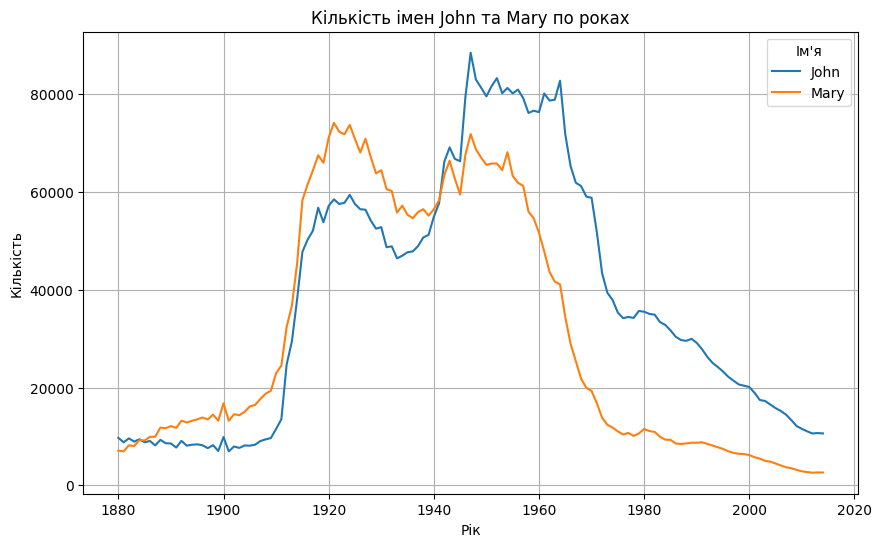

In [82]:
# 25. Графік розподілення кількості імен John та Mary по роках
names_to_plot = data[data['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
plt.figure(figsize=(10, 6))
names_to_plot.plot(ax=plt.gca(), title="Кількість імен John та Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend(title="Ім'я")
plt.grid()
plt.savefig("john_mary_distribution.png")
plt.show()

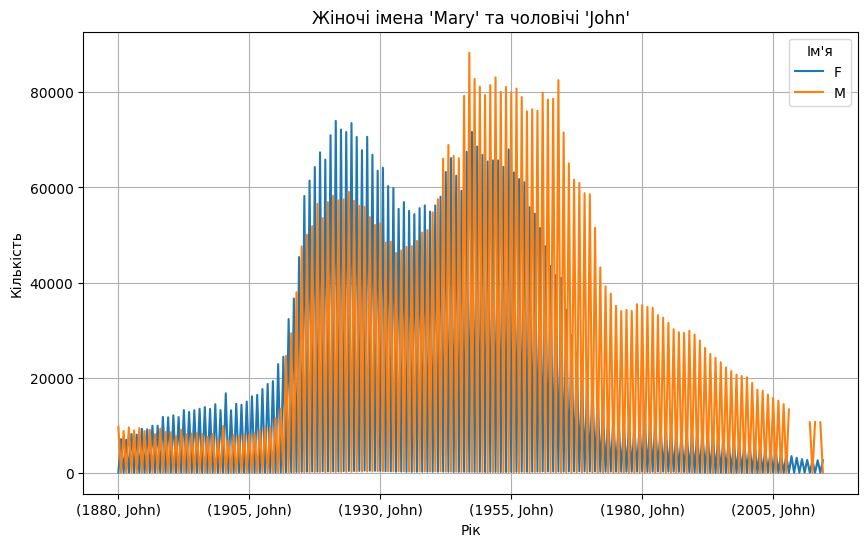

In [83]:
# 26. Графік розподілення кількості жіночих імен Mary та чоловічих John
john_mary_gender = data[(data['Name'].isin(['John', 'Mary'])) & (data['Gender'].isin(['M', 'F']))]
john_mary_gender_grouped = john_mary_gender.groupby(['Year', 'Name', 'Gender'])['Count'].sum().unstack()
plt.figure(figsize=(10, 6))
john_mary_gender_grouped.plot(ax=plt.gca(), title="Жіночі імена 'Mary' та чоловічі 'John'")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend(title="Ім'я")
plt.grid()
plt.savefig("john_mary_gender_distribution.png")
plt.show()


In [84]:
# 27. Найпопулярніші імена в кожному році
most_popular_names_by_year = data.loc[data.groupby('Year')['Count'].idxmax()]
print("\n27. Найпопулярніші імена в кожному році:")
print(most_popular_names_by_year[['Year', 'Name', 'Count']].head())


27. Найпопулярніші імена в кожному році:
      Year  Name  Count
942   1880  John   9655
2938  1881  John   8769
4963  1882  John   9557
7116  1883  John   8894
9318  1884  John   9388
